In [1]:
import sys
sys.path.append("..")
from MPRA_predict.utils import *
from MPRA_predict.datasets import *
from MPRA_predict.metrics import *

In [12]:
# cell_types = ['K562', 'HepG2', 'SK-N-SH', 'HCT116', 'A549']
# assays = ['DNase', 'H3K4me3', 'H3K27ac', 'CTCF']

# MPRA_df = pd.read_csv('../data/Gosai_MPRA/Gosai_MPRA_Sei_feature_0504_norm.csv')
# MPRA_df

In [2]:
cell_types = ['K562', 'HepG2']
assays = ['DNase', 'H3K4me3', 'H3K27ac', 'CTCF']

MPRA_df = pd.read_csv('../data/Agarwal_MPRA/Agarwal_MPRA_Sei_feature_norm.csv')
MPRA_df

,seq,chr,HepG2,K562,WTC11,K562_DNase,K562_H3K4me3,K562_H3K27ac,K562_H3K27me3,K562_H3K4me1,K562_H3K36me3,K562_H3K9me3,K562_CTCF,HepG2_DNase,HepG2_H3K4me3,HepG2_H3K27ac,HepG2_H3K27me3,HepG2_H3K4me1,HepG2_H3K36me3,HepG2_H3K9me3,HepG2_CTCF
0,AGGACCGGATCAACTGTAGGACCAGGCTCTGCCTCCTTCTCTCTCC...,chr1,0.633,0.080,-0.387,1.528,2.065,1.971,-6.207,-5.281,-8.028,-3.572,0.949,1.241,1.943,1.526,-4.622,-6.464,-7.187,-3.427,0.865
1,AGGACCGGATCAACTTGTACTTGCCTTAGGAGGTCAAACACATTAG...,chr10,-1.157,-1.147,-1.507,0.599,0.946,0.564,-6.399,-6.249,-8.733,-6.049,0.563,0.667,0.920,0.727,-4.510,-6.444,-7.940,-3.510,0.635
2,AGGACCGGATCAACTTAGCTCAACACAAATCCATCACTGAAAGCAG...,chr10,-0.066,0.186,0.655,3.294,1.199,0.505,-7.608,-6.247,-7.947,-5.339,5.599,2.986,1.780,1.271,-7.291,-6.640,-8.013,-5.124,5.660
3,AGGACCGGATCAACTGACCCTAAATCAGTATGGGGAAAGGTCCCCA...,chr10,0.846,1.212,-0.637,1.940,1.726,2.129,-6.507,-4.444,-8.702,-5.328,1.059,2.013,1.823,2.210,-5.681,-5.088,-8.140,-3.958,1.090
4,AGGACCGGATCAACTGTGATCTCAGCTTACTGCAACCTCTGCCTCC...,chr10,-0.784,-0.630,-0.612,0.675,0.000,0.000,-8.398,-8.754,-10.251,-5.086,3.078,0.000,0.000,0.000,-9.262,-9.425,-9.639,-4.946,3.059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56970,AGGACCGGATCAACTCCAAGTCTGCCATCGTGTTCAGAAGGGCCAG...,chrnan,-1.192,-1.080,-1.680,0.575,1.192,1.006,-6.592,-6.735,-9.013,-5.632,0.415,0.216,1.027,0.824,-4.938,-7.513,-8.039,-3.846,0.251
56971,AGGACCGGATCAACTCCAAGTCTGCCATCGTGTTCAGAAGGGCCAG...,chrnan,-0.582,-1.094,-1.637,1.085,1.397,1.176,-7.062,-5.850,-9.326,-6.348,0.142,0.951,1.414,1.144,-6.196,-5.874,-9.238,-3.973,0.170
56972,AGGACCGGATCAACTCCAAGTCTGCCATCGTGTTCATGTTTGCTTT...,chrnan,-0.855,-0.554,-1.083,0.909,1.161,1.147,-7.050,-5.873,-8.751,-6.727,0.689,3.845,2.240,2.768,-6.771,-3.316,-9.631,-5.968,1.846
56973,AGGACCGGATCAACTCCAAGTCTGCCATCGTGTTCAGAAGGGCCAG...,chrnan,-1.231,-0.927,-1.606,0.035,0.370,0.180,-7.004,-7.649,-9.706,-6.395,0.000,0.206,0.611,0.546,-5.795,-7.164,-8.870,-3.975,0.026


In [3]:
data_split_dict = {}
data_split_dict['total'] = np.ones(len(MPRA_df), dtype=bool)

data_split_dict['chrom'] = MPRA_df['chr'].isin([f'chr{i}' for i in (list(range(1, 23)) + ['X', 'Y'])])
data_split_dict['not_chrom'] = ~data_split_dict['chrom']

data_split_dict['train'] = MPRA_df['chr'].isin([f'chr{i}' for i in (list(range(3, 23)) + ['X', 'Y'])])
data_split_dict['valid'] = MPRA_df['chr'].isin(['chr1'])
data_split_dict['test'] = MPRA_df['chr'].isin(['chr2'])

MPRA_df['std'] = MPRA_df[cell_types].std(axis=1, skipna=True)
threshold = np.percentile(MPRA_df['std'].dropna(), 90)
data_split_dict['diff'] = (MPRA_df['std'] > threshold)
data_split_dict['const'] = ~data_split_dict['diff']



# data_split_dict['ref'] = (MPRA_df['allele'] == 'ref') | (MPRA_df['allele'].isna())
# data_split_dict['alt'] = MPRA_df['allele'] == 'alt'

# data_split_dict['high'] = MPRA_df[cell_types].mean(axis=1) > 1

# for cell_type in cell_types:
#     data_split_dict[f'{cell_type}_specific'] = (MPRA_df[cell_type] - MPRA_df[cell_types].mean(axis=1)).abs() > 1

# for cell_type in cell_types:
#     data_split_dict[f'{cell_type}_high'] = (MPRA_df[cell_type]) > 1



# # MPRA_df['diff'] = (MPRA_df[cell_types].max(axis=1) - MPRA_df[cell_types].min(axis=1)) > 1
# # data_split_dict['const'] = ~MPRA_df['diff']
# # data_split_dict['diff']  = MPRA_df['diff']

for key in data_split_dict:
    print(key, data_split_dict[key].sum())

keys = list(data_split_dict.keys())
for k1 in keys:
    for k2 in keys:
        data_split_dict[f'{k1}_{k2}'] = data_split_dict[k1] & data_split_dict[k2]

total 56975
chrom 56337
not_chrom 638
train 46131
valid 5590
test 4616
diff 5696
const 51279


In [6]:
# seq feature
# train 3 cell types

cell_types = ['K562', 'HepG2']

y_pred = np.load(f'../saved/0504_GosaiMPRA_MyResTransformer3/0504_134132/Agarwal_pred.npy')
cell_types_pred = [f'{cell_type}_pred' for cell_type in cell_types]
MPRA_df[cell_types_pred] = y_pred

In [7]:
# 预测值和真实值的相关性

for data_split in ['train', 'test', 'const', 'diff']:
    corr_matrix = pd.DataFrame(index=cell_types, columns=cell_types_pred)
    for cell_type in cell_types:
        for cell_type_pred in cell_types_pred:
            condition = data_split_dict[data_split]
            df = MPRA_df[condition]
            x = df[f'{cell_type}']
            y = df[f'{cell_type_pred}']
            r, p = pearson(x, y)
            corr_matrix.loc[cell_type, cell_type_pred] = r
    print(data_split)
    print(corr_matrix)

train
      K562_pred HepG2_pred
K562      0.727      0.617
HepG2     0.595      0.706
test
      K562_pred HepG2_pred
K562      0.702      0.567
HepG2     0.530      0.676
const
      K562_pred HepG2_pred
K562      0.746      0.698
HepG2     0.690      0.734
diff
      K562_pred HepG2_pred
K562      0.558     -0.027
HepG2     0.042      0.609


0.720309738396121


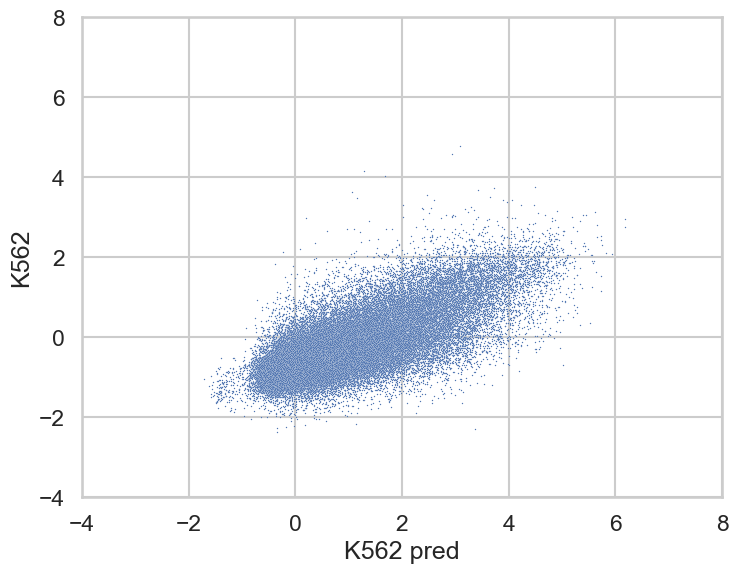

In [8]:
plt.figure(figsize=(8,6), dpi=100)
plt.subplots_adjust(left=0.15, bottom=0.15, right=0.95, top=0.95)

x = MPRA_df['K562_pred']
y = MPRA_df['K562']
sns.scatterplot(x=x, y=y, s=1)
r, _ = pearson(x, y)
print(r)
plt.xlim(-4, 8)
plt.ylim(-4, 8)
plt.xlabel('K562 pred')
plt.ylabel('K562')

plt.savefig('figures/Agarwal_MPRA_K562_pred.png', dpi=400)

0.7098594699892655


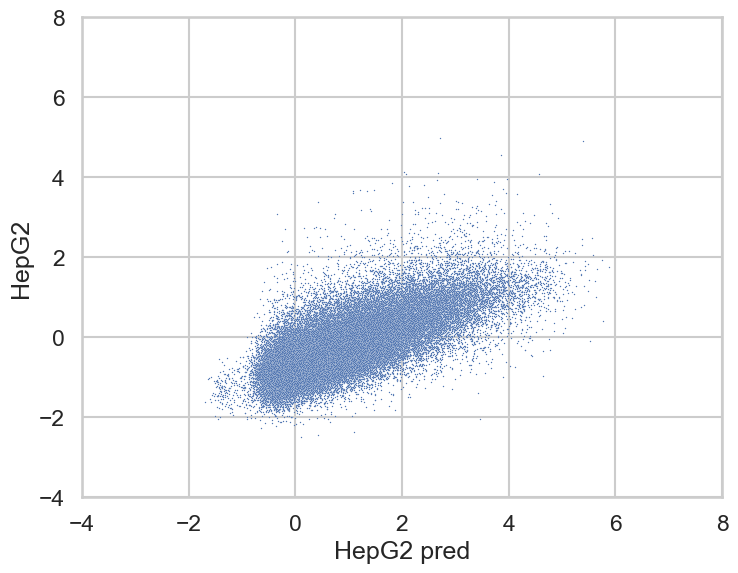

In [9]:
plt.figure(figsize=(8,6), dpi=100)
plt.subplots_adjust(left=0.15, bottom=0.15, right=0.95, top=0.95)

x = MPRA_df['HepG2_pred']
y = MPRA_df['HepG2']
sns.scatterplot(x=x, y=y, s=1)
r, _ = pearson(x, y)
print(r)
plt.xlim(-4, 8)
plt.ylim(-4, 8)
plt.xlabel('HepG2 pred')
plt.ylabel('HepG2')

plt.savefig('figures/Agarwal_MPRA_HepG2_pred.png', dpi=400)

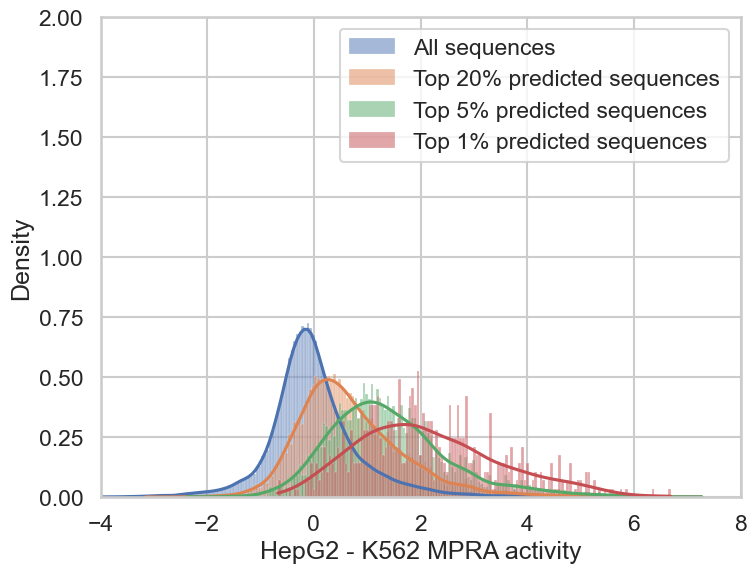

In [30]:
cell_types = ['K562', 'HepG2']
cell_types_pred = [f'{cell}_pred' for cell in cell_types]

MPRA_df['HepG2-K562'] = MPRA_df['HepG2'] - MPRA_df['K562']
MPRA_df['HepG2-K562_pred'] = MPRA_df['HepG2_pred'] - MPRA_df['K562_pred']


plt.figure(figsize=(8,6), dpi=100)
plt.subplots_adjust(left=0.15, bottom=0.15, right=0.95, top=0.95)

sns.histplot(MPRA_df['HepG2-K562'], binwidth=5e-2, stat='density', alpha=0.5, label='All sequences', kde=True)

threshold = np.percentile(MPRA_df['HepG2-K562_pred'], 80)
filtered_df = MPRA_df[MPRA_df['HepG2-K562_pred'] > threshold]
sns.histplot(filtered_df['HepG2-K562'], binwidth=5e-2, stat='density', alpha=0.5, label='Top 20% predicted sequences', kde=True)

threshold = np.percentile(MPRA_df['HepG2-K562_pred'], 95)
filtered_df = MPRA_df[MPRA_df['HepG2-K562_pred'] > threshold]
sns.histplot(filtered_df['HepG2-K562'], binwidth=5e-2, stat='density', alpha=0.5, label='Top 5% predicted sequences', kde=True)

threshold = np.percentile(MPRA_df['HepG2-K562_pred'], 99)
filtered_df = MPRA_df[MPRA_df['HepG2-K562_pred'] > threshold]
sns.histplot(filtered_df['HepG2-K562'], binwidth=5e-2, stat='density', alpha=0.5, label='Top 1% predicted sequences', kde=True)

plt.xlim(-4, 8)
plt.ylim(0, 2)
plt.xlabel('HepG2 - K562 MPRA activity')
plt.ylabel('Density')
plt.legend()
plt.savefig('figures/Agarwal_MPRA_HepG2-K562_sequence_prioritization.png', dpi=400)

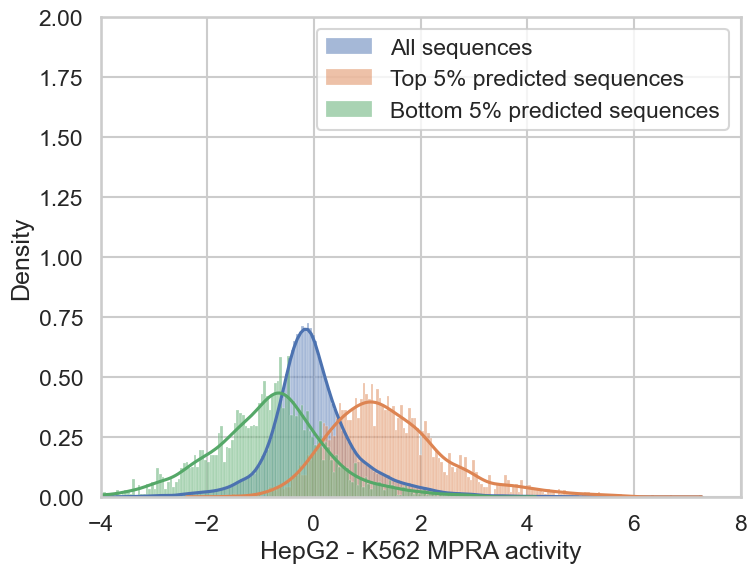

In [31]:
cell_types = ['K562', 'HepG2']
cell_types_pred = [f'{cell}_pred' for cell in cell_types]

MPRA_df['HepG2-K562'] = MPRA_df['HepG2'] - MPRA_df['K562']
MPRA_df['HepG2-K562_pred'] = MPRA_df['HepG2_pred'] - MPRA_df['K562_pred']


plt.figure(figsize=(8,6), dpi=100)
plt.subplots_adjust(left=0.15, bottom=0.15, right=0.95, top=0.95)

sns.histplot(MPRA_df['HepG2-K562'], binwidth=5e-2, stat='density', alpha=0.5, label='All sequences', kde=True)

# threshold = np.percentile(MPRA_df['HepG2-K562_pred'], 80)
# filtered_df = MPRA_df[MPRA_df['HepG2-K562_pred'] > threshold]
# sns.histplot(filtered_df['HepG2-K562'], binwidth=5e-2, stat='density', alpha=0.5, label='Top 20% predicted sequences', kde=True)

threshold = np.percentile(MPRA_df['HepG2-K562_pred'], 95)
filtered_df = MPRA_df[MPRA_df['HepG2-K562_pred'] > threshold]
sns.histplot(filtered_df['HepG2-K562'], binwidth=5e-2, stat='density', alpha=0.5, label='Top 5% predicted sequences', kde=True)


threshold = np.percentile(MPRA_df['HepG2-K562_pred'], 5)
filtered_df = MPRA_df[MPRA_df['HepG2-K562_pred'] < threshold]
sns.histplot(filtered_df['HepG2-K562'], binwidth=5e-2, stat='density', alpha=0.5, label='Bottom 5% predicted sequences', kde=True)

# threshold = np.percentile(MPRA_df['HepG2-K562_pred'], 99)
# filtered_df = MPRA_df[MPRA_df['HepG2-K562_pred'] > threshold]
# sns.histplot(filtered_df['HepG2-K562'], binwidth=5e-2, stat='density', alpha=0.5, label='Top 1% predicted sequences', kde=True)

plt.xlim(-4, 8)
plt.ylim(0, 2)
plt.xlabel('HepG2 - K562 MPRA activity')
plt.ylabel('Density')
plt.legend()
plt.savefig('figures/Agarwal_MPRA_HepG2-K562_sequence_prioritization.png', dpi=400)

In [27]:
MPRA_df

,Unnamed: 0,seq,chr,HepG2,K562,WTC11,K562_DNase,K562_H3K4me3,K562_H3K27ac,K562_H3K27me3,K562_H3K4me1,K562_H3K36me3,K562_H3K9me3,K562_CTCF,HepG2_DNase,HepG2_H3K4me3,HepG2_H3K27ac,HepG2_H3K27me3,HepG2_H3K4me1,HepG2_H3K36me3,HepG2_H3K9me3,HepG2_CTCF,K562_pred,HepG2_pred,std
0,0,AGGACCGGATCAACTGTAGGACCAGGCTCTGCCTCCTTCTCTCTCC...,chr1,1.114,0.352,-0.387,-0.602,0.322,0.220,0.706,0.009,0.340,0.960,-0.687,-0.750,0.193,-0.057,0.843,-0.539,1.015,1.033,-0.759,0.584,0.554,0.539
1,1,AGGACCGGATCAACTTGTACTTGCCTTAGGAGGTCAAACACATTAG...,chr10,-1.315,-1.246,-1.507,-1.419,-0.894,-1.021,0.389,-0.788,-0.499,-1.055,-0.881,-1.287,-0.984,-0.786,0.934,-0.524,0.043,0.889,-0.875,-0.812,-0.807,0.049
2,2,AGGACCGGATCAACTTAGCTCAACACAAATCCATCACTGAAAGCAG...,chr10,0.166,0.490,0.655,0.950,-0.619,-1.073,-1.610,-0.786,0.437,-0.477,1.651,0.886,0.005,-0.289,-1.309,-0.677,-0.051,-1.905,1.663,-0.002,0.030,0.229
3,3,AGGACCGGATCAACTGACCCTAAATCAGTATGGGGAAAGGTCCCCA...,chr10,1.404,1.826,-0.637,-0.241,-0.046,0.359,0.210,0.698,-0.461,-0.468,-0.632,-0.026,0.054,0.569,-0.011,0.542,-0.215,0.113,-0.645,0.283,0.375,0.299
4,4,AGGACCGGATCAACTGTGATCTCAGCTTACTGCAACCTCTGCCTCC...,chr10,-0.809,-0.573,-0.612,-1.352,-2.547,-2.427,-2.914,-2.849,-2.305,-0.271,0.384,-1.941,-3.134,-2.488,-2.899,-2.863,-2.150,-1.598,0.349,-0.422,-0.427,0.167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56970,56970,AGGACCGGATCAACTCCAAGTCTGCCATCGTGTTCAGAAGGGCCAG...,chrnan,-1.363,-1.159,-1.680,-1.440,-0.627,-0.631,0.070,-1.188,-0.831,-0.715,-0.956,-1.710,-0.861,-0.698,0.588,-1.363,-0.085,0.308,-1.069,-0.573,-0.570,0.144
56971,56971,AGGACCGGATCAACTCCAAGTCTGCCATCGTGTTCAGAAGGGCCAG...,chrnan,-0.535,-1.177,-1.637,-0.992,-0.404,-0.481,-0.707,-0.460,-1.205,-1.298,-1.093,-1.021,-0.416,-0.405,-0.426,-0.075,-1.632,0.087,-1.110,0.551,0.563,0.454
56972,56972,AGGACCGGATCAACTCCAAGTCTGCCATCGTGTTCATGTTTGCTTT...,chrnan,-0.906,-0.474,-1.083,-1.146,-0.661,-0.507,-0.687,-0.478,-0.520,-1.606,-0.818,1.691,0.535,1.078,-0.889,1.933,-2.140,-3.367,-0.264,0.038,0.096,0.305
56973,56973,AGGACCGGATCAACTCCAAGTCTGCCATCGTGTTCAGAAGGGCCAG...,chrnan,-1.416,-0.960,-1.606,-1.915,-1.521,-1.359,-0.612,-1.940,-1.657,-1.336,-1.177,-1.719,-1.340,-0.952,-0.103,-1.088,-1.158,0.085,-1.183,-0.576,-0.571,0.323


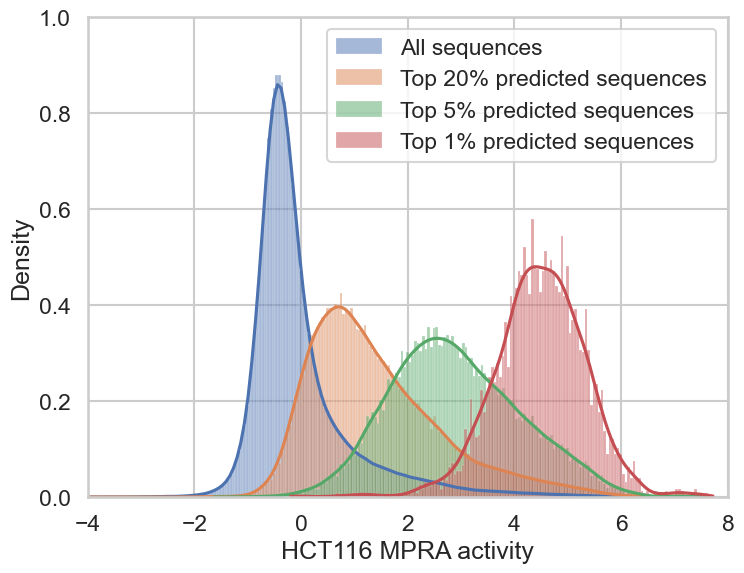

In [51]:
MPRA_df = MPRA_df[MPRA_df['HCT116'].notna()]

plt.figure(figsize=(8,6), dpi=100)
plt.subplots_adjust(left=0.15, bottom=0.15, right=0.95, top=0.95)

sns.histplot(MPRA_df['HCT116'], binwidth=5e-2, stat='density', alpha=0.5, label='All sequences', kde=True)

threshold = np.percentile(MPRA_df['HCT116_pred'], 80)
filtered_df = MPRA_df[MPRA_df['HCT116_pred'] > threshold]
sns.histplot(filtered_df['HCT116'], binwidth=5e-2, stat='density', alpha=0.5, label='Top 20% predicted sequences', kde=True)

threshold = np.percentile(MPRA_df['HCT116_pred'], 95)
filtered_df = MPRA_df[MPRA_df['HCT116_pred'] > threshold]
sns.histplot(filtered_df['HCT116'], binwidth=5e-2, stat='density', alpha=0.5, label='Top 5% predicted sequences', kde=True)

threshold = np.percentile(MPRA_df['HCT116_pred'], 99)
filtered_df = MPRA_df[MPRA_df['HCT116_pred'] > threshold]
sns.histplot(filtered_df['HCT116'], binwidth=5e-2, stat='density', alpha=0.5, label='Top 1% predicted sequences', kde=True)


plt.xlim(-4, 8)
plt.ylim(0, 1)
plt.xlabel('HCT116 MPRA activity')
plt.ylabel('Density')
plt.legend()
plt.savefig('figures/Gosai_MPRA_HCT116_sequence_prioritization.png', dpi=400)

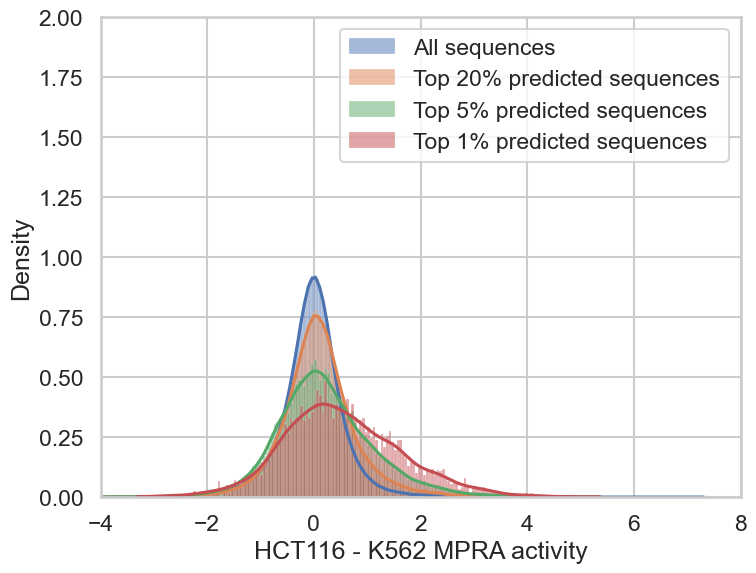

In [50]:
MPRA_df = MPRA_df[MPRA_df['HCT116'].notna()]

cell_types = ['K562', 'HepG2', 'SK-N-SH', 'HCT116']
cell_types_pred = [f'{cell}_pred' for cell in cell_types]

MPRA_df['HCT116-K562'] = MPRA_df['HCT116'] - MPRA_df['K562']
MPRA_df['HCT116-K562_pred'] = MPRA_df['HCT116_pred'] - MPRA_df['K562_pred']


plt.figure(figsize=(8,6), dpi=100)
plt.subplots_adjust(left=0.15, bottom=0.15, right=0.95, top=0.95)

sns.histplot(MPRA_df['HCT116-K562'], binwidth=5e-2, stat='density', alpha=0.5, label='All sequences', kde=True)

threshold = np.percentile(MPRA_df['HCT116-K562_pred'], 80)
filtered_df = MPRA_df[MPRA_df['HCT116-K562_pred'] > threshold]
sns.histplot(filtered_df['HCT116-K562'], binwidth=5e-2, stat='density', alpha=0.5, label='Top 20% predicted sequences', kde=True)

threshold = np.percentile(MPRA_df['HCT116-K562_pred'], 95)
filtered_df = MPRA_df[MPRA_df['HCT116-K562_pred'] > threshold]
sns.histplot(filtered_df['HCT116-K562'], binwidth=5e-2, stat='density', alpha=0.5, label='Top 5% predicted sequences', kde=True)

threshold = np.percentile(MPRA_df['HCT116-K562_pred'], 99)
filtered_df = MPRA_df[MPRA_df['HCT116-K562_pred'] > threshold]
sns.histplot(filtered_df['HCT116-K562'], binwidth=5e-2, stat='density', alpha=0.5, label='Top 1% predicted sequences', kde=True)

plt.xlim(-4, 8)
plt.ylim(0, 2)
plt.xlabel('HCT116 - K562 MPRA activity')
plt.ylabel('Density')
plt.legend()
plt.savefig('figures/Gosai_MPRA_HCT116-K562_sequence_prioritization.png', dpi=400)

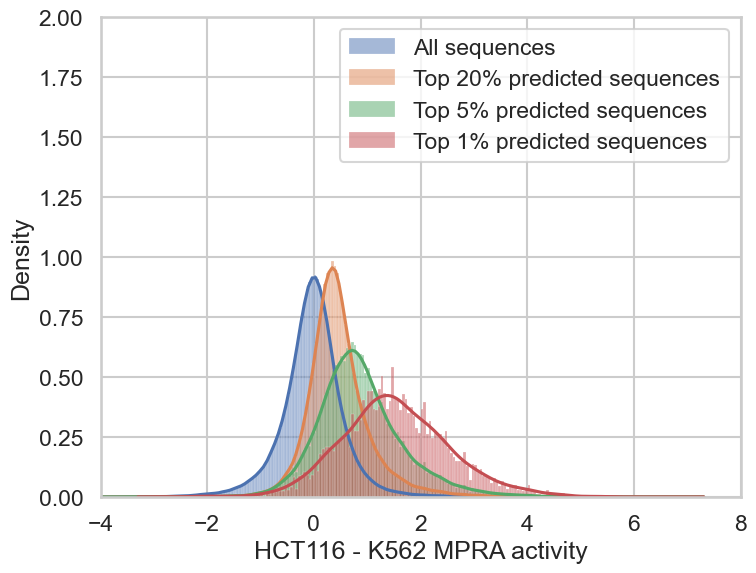

In [56]:
MPRA_df = MPRA_df[MPRA_df['HCT116'].notna()]

cell_types = ['K562', 'HepG2', 'SK-N-SH', 'HCT116']
cell_types_pred = [f'{cell}_pred' for cell in cell_types]

MPRA_df['HCT116-K562'] = MPRA_df['HCT116'] - MPRA_df['K562']
MPRA_df['HCT116-K562_pred'] = MPRA_df['HCT116_pred'] - MPRA_df['K562']
#######MPRA_df['HCT116-K562_pred'] = MPRA_df['HCT116_pred'] - MPRA_df['K562_pred']
#######这里我应该假设已知K562活性吗？

plt.figure(figsize=(8,6), dpi=100)
plt.subplots_adjust(left=0.15, bottom=0.15, right=0.95, top=0.95)

sns.histplot(MPRA_df['HCT116-K562'], binwidth=5e-2, stat='density', alpha=0.5, label='All sequences', kde=True)

threshold = np.percentile(MPRA_df['HCT116-K562_pred'], 80)
filtered_df = MPRA_df[MPRA_df['HCT116-K562_pred'] > threshold]
sns.histplot(filtered_df['HCT116-K562'], binwidth=5e-2, stat='density', alpha=0.5, label='Top 20% predicted sequences', kde=True)

threshold = np.percentile(MPRA_df['HCT116-K562_pred'], 95)
filtered_df = MPRA_df[MPRA_df['HCT116-K562_pred'] > threshold]
sns.histplot(filtered_df['HCT116-K562'], binwidth=5e-2, stat='density', alpha=0.5, label='Top 5% predicted sequences', kde=True)

threshold = np.percentile(MPRA_df['HCT116-K562_pred'], 99)
filtered_df = MPRA_df[MPRA_df['HCT116-K562_pred'] > threshold]
sns.histplot(filtered_df['HCT116-K562'], binwidth=5e-2, stat='density', alpha=0.5, label='Top 1% predicted sequences', kde=True)

plt.xlim(-4, 8)
plt.ylim(0, 2)
plt.xlabel('HCT116 - K562 MPRA activity')
plt.ylabel('Density')
plt.legend()
plt.savefig('figures/Gosai_MPRA_HCT116-K562_sequence_prioritization.png', dpi=400)

0.2912329242263634


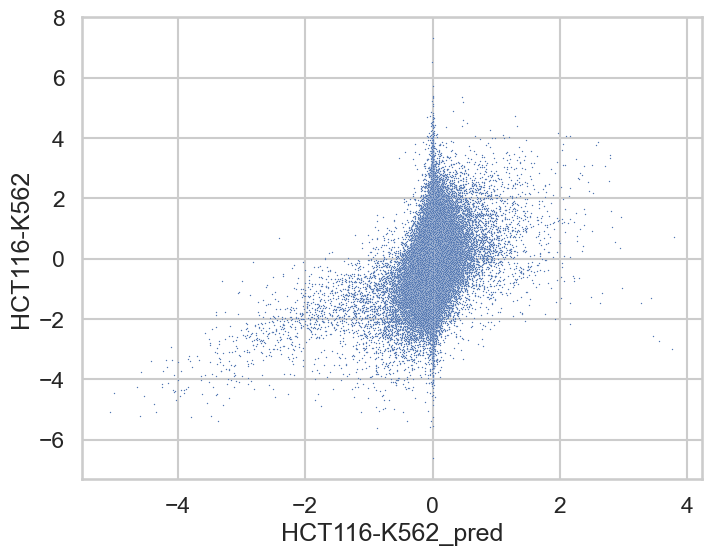

In [41]:
x=MPRA_df['HCT116-K562_pred']
y=MPRA_df['HCT116-K562']
sns.scatterplot(x=x, y=y, s=1)
r, _ = pearson(x, y)
print(r)

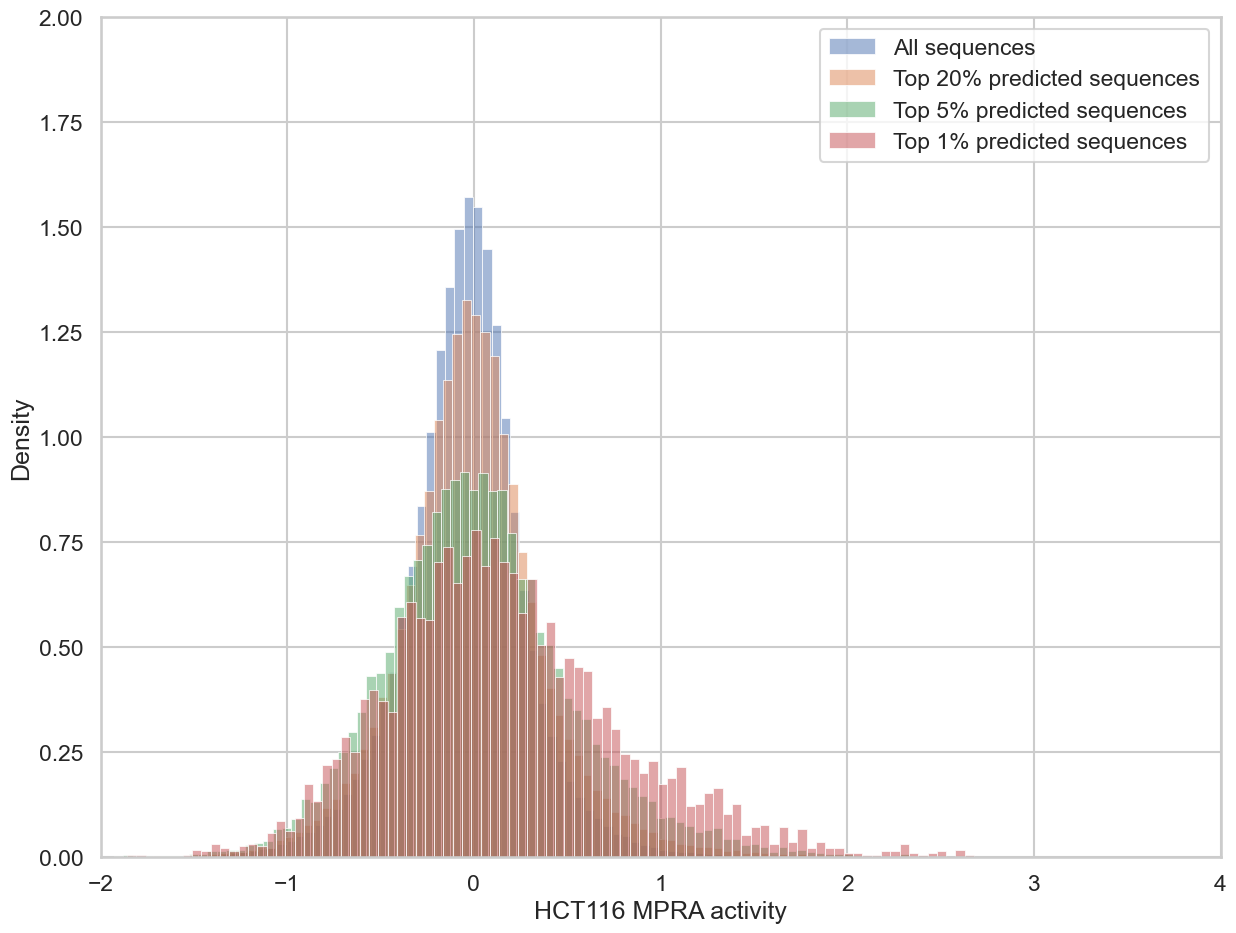

In [39]:
MPRA_df = MPRA_df[MPRA_df['HCT116'].notna()]

cell_types = ['K562', 'HepG2', 'SK-N-SH', 'HCT116']
cell_types_pred = [f'{cell}_pred' for cell in cell_types]

MPRA_df['HCT116_deviation'] = MPRA_df['HCT116'] - MPRA_df[cell_types].mean(axis=1)
MPRA_df['HCT116_pred_deviation'] = MPRA_df['HCT116_pred'] - MPRA_df[cell_types_pred].mean(axis=1)


plt.figure(figsize=(16,12), dpi=100)
plt.subplots_adjust(left=0.2, bottom=0.2, right=0.9, top=0.9)

sns.histplot(MPRA_df['HCT116_deviation'], binwidth=5e-2, stat='density', alpha=0.5, label='All sequences')

threshold = np.percentile(MPRA_df['HCT116_pred_deviation'], 80)
filtered_df = MPRA_df[MPRA_df['HCT116_pred_deviation'] > threshold]
sns.histplot(filtered_df['HCT116_deviation'], binwidth=5e-2, stat='density', alpha=0.5, label='Top 20% predicted sequences')

threshold = np.percentile(MPRA_df['HCT116_pred_deviation'], 95)
filtered_df = MPRA_df[MPRA_df['HCT116_pred_deviation'] > threshold]
sns.histplot(filtered_df['HCT116_deviation'], binwidth=5e-2, stat='density', alpha=0.5, label='Top 5% predicted sequences')

threshold = np.percentile(MPRA_df['HCT116_pred_deviation'], 99)
filtered_df = MPRA_df[MPRA_df['HCT116_pred_deviation'] > threshold]
sns.histplot(filtered_df['HCT116_deviation'], binwidth=5e-2, stat='density', alpha=0.5, label='Top 1% predicted sequences')

plt.xlim(-2, 4)
plt.ylim(0, 2)
plt.xlabel('HCT116 MPRA activity')
plt.ylabel('Density')
plt.legend()
plt.savefig('figures/Gosai_MPRA_HCT116_deviation_sequence_prioritization.png', dpi=400)